# Time Series Forecasting
### Kasus Inflasi Indonesia

### Load data ke Pandas DataFrame

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import timedelta

# Import the data
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

df = pd.read_csv('data/Inflasi_TimeSeries.csv', header=None, skiprows=1, parse_dates=[0], date_parser=dateparse, names=['period', 'value'])

# Clean/Organize the data. 
print(df.head())
sns.set(style="ticks")

      period   value
0 2003-01-01  0.0868
1 2003-02-01  0.0760
2 2003-03-01  0.0717
3 2003-04-01  0.0762
4 2003-05-01  0.0715


### Preprocess

In [49]:
max_date = df.period.max()
min_date = df.period.min()

num_of_actual_points = df.index.shape[0]
num_of_expected_points = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month + 1

print("Range waktu: {} - {}".format(min_date.strftime("%d.%m.%Y"), max_date.strftime("%d.%m.%Y")))
#print("Number of data points: {} of expected {}".format(num_of_actual_points, num_of_expected_points))
print(df.head())

Range waktu: 01.01.2003 - 01.04.2019
      period   value
0 2003-01-01  0.0868
1 2003-02-01  0.0760
2 2003-03-01  0.0717
3 2003-04-01  0.0762
4 2003-05-01  0.0715


### Visualisasi data

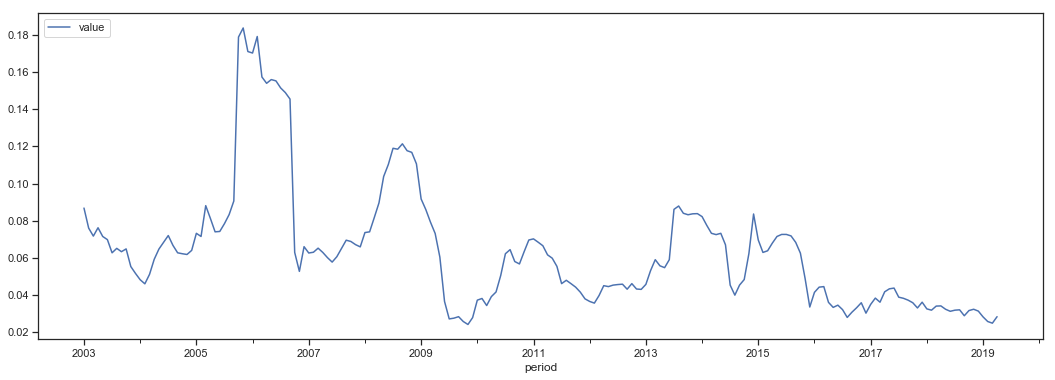

In [50]:
fig, ax = plt.subplots(figsize=(18,6))
df.plot(x="period", y="value", ax=ax)
plt.legend(loc='upper left')
plt.show();

Sekarang kita menghitung koefisien untuk "memotong" garis. Metthod NumPy polyfit bisa melakukannya.
Kemudian kita tentukan fungsi polinomial menggunakan koefisien itu. Kita dapat melakukan ini pada satu dimensi menggunakan method poly1d NumPy.

In [52]:
line_coef = np.polyfit(df.index,df['value'],1)
print(line_coef)

polynomial = np.poly1d(line_coef)
# The intercept is ~86.59, the slops is ~0.11
print(polynomial(0))
print(polynomial(1))

[-0.0002989   0.09292003]
0.09292003004247383
0.09262112758887232


### Plot trendline pada data

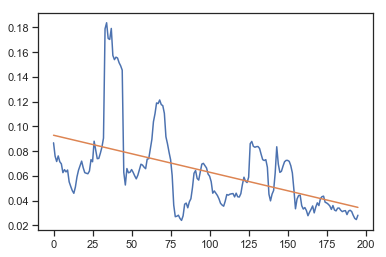

In [54]:
# Plot time series
plt.plot(df.index, df['value'])
# Plot least squares minimizing line
plt.plot(df.index, polynomial(df.index));

### Trend turun, per tahun seasonal

## Trend and seasonality

Dari visualisasi sudah cukup jelas bahwa inflasi memiliki fluktuasi berkala setiap tahun dan kecenderungan keseluruhan untuk turun.

Dengan demikian, kita dapat menyimpulkan bahwa time series memiliki komponen **trend** dan **seasonality** tahunan, dan kita dapat mencoba menguraikannya menggunakan paket **statsmodels**.

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("period").value.interpolate("linear"),
    freq=decompfreq,
    model=model)

In [56]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

### Tren/Trend

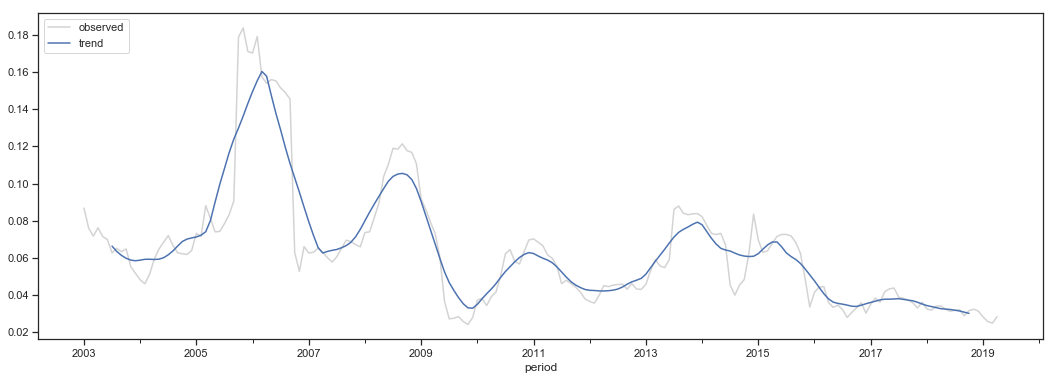

In [57]:
fig, ax = plt.subplots(figsize=(18,6))
df.plot(x="period", y="value", ax=ax, label="observed", c='lightgrey')
trend.plot(ax=ax, label="trend")
plt.legend(loc='upper left')

plt.show();

### Seasonality

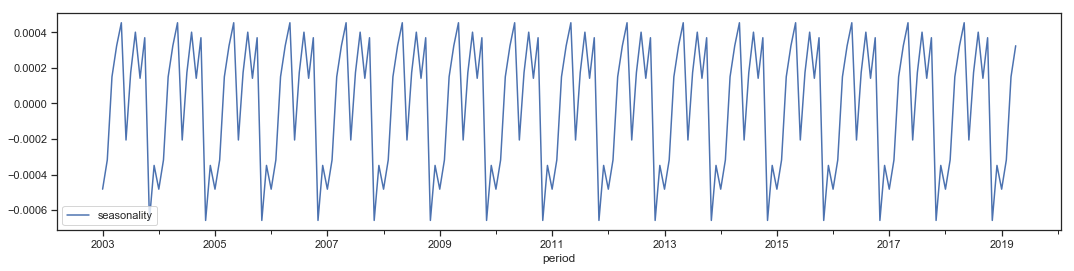

In [59]:
fig, ax = plt.subplots(figsize=(18,4))
seasonal.plot(ax=ax, label="seasonality")
plt.legend(loc='lower left')

plt.show();

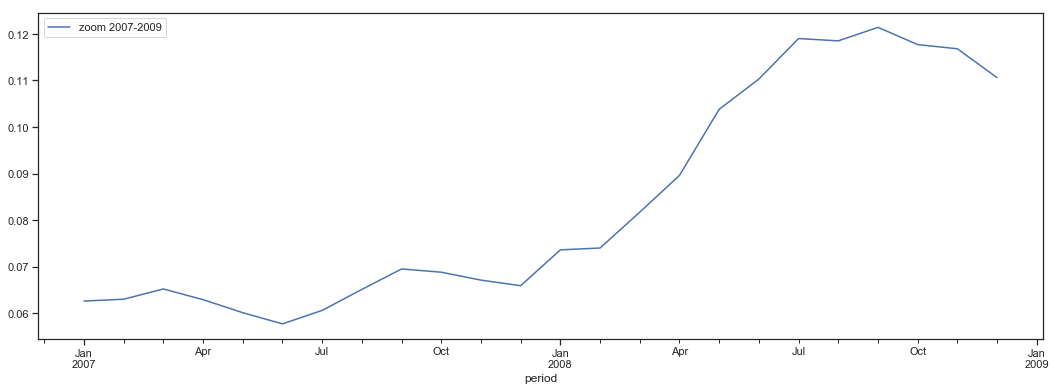

In [69]:
zoom_range = df[(df.period >= '2007-01-01') & (df.period < '2009-01-01')].index

fig, ax = plt.subplots(figsize=(18,6))
df.loc[zoom_range].plot(x="period", y="value", ax=ax, label="zoom 2007-2009")
plt.legend(loc='upper left')

plt.show();

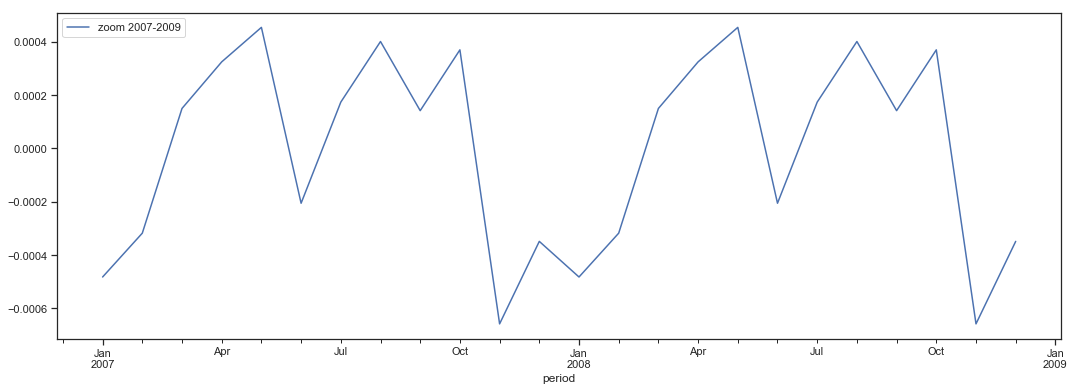

In [70]:
fig, ax = plt.subplots(figsize=(18,6))
seasonal[zoom_range].plot(x="period", y="value", ax=ax, label="zoom 2007-2009")
plt.legend(loc='upper left')

plt.show();

### Residu/Residual

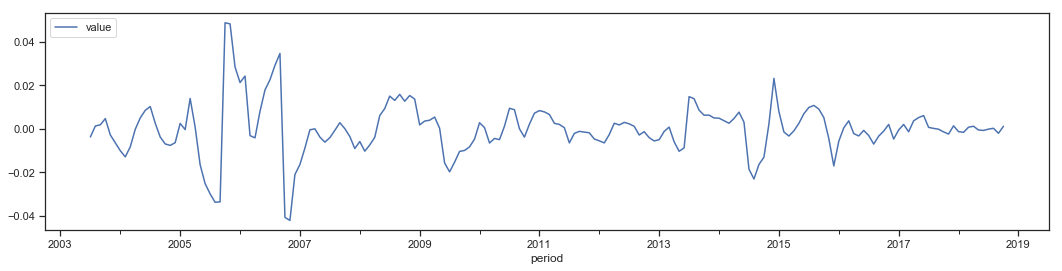

In [68]:
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, legend="seasonality")
plt.legend(loc='upper left')

plt.show();